**Deep Learning - Trabalho Conclusão de Módulo**

> 27/04/2024




**Integrantes**

- André Luiz Pires Guimarães
- Daniel de Souza Miranda
- Iago Nery Mendes
- Lucas Elias de Andrade Cruvinel
- Victor Hugo Brito da Silva Miranda

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [3]:
df_milk = pd.read_csv("RecurrentNeuralNetwork/milk.csv", parse_dates=["Date"])
df_milk.dropna(how='any', axis=0, inplace=True, ignore_index=True)
df_milk.shape

(25846, 10)

In [4]:
# Nome da coluna que deseja mover para a última posição
coluna = 'milk_production'

# Remover a coluna do DataFrame
coluna_removida = df_milk.pop(coluna)

# Inserir a coluna removida na última posição
df_milk.insert(len(df_milk.columns), coluna, coluna_removida)

In [5]:
df_milk.head()

,AnEar,Date,lactation,dim,MilkShif,Cond,Dur,Peak,dim2,milk_production
0,123,2023-01-09,4,1,11.50,5.420,276.0,6.7,1,11.5
1,123,2023-01-10,4,2,24.20,4.945,384.0,15.0,2,48.4
2,123,2023-01-11,4,3,33.20,5.060,672.0,15.5,3,66.4
3,123,2023-01-12,4,4,28.55,4.940,354.0,16.4,4,57.1
4,123,2023-01-13,4,5,39.25,5.055,396.0,17.0,5,78.5


In [6]:
df_milk.tail()

,AnEar,Date,lactation,dim,MilkShif,Cond,Dur,Peak,dim2,milk_production
25841,9977,2023-12-13,2,301,36.40,4.980,540.0,13.8,301,72.8
25842,9977,2023-12-14,2,302,36.50,4.700,600.0,12.9,302,73.0
25843,9977,2023-12-15,2,303,35.45,5.075,540.0,13.3,303,70.9
25844,9977,2023-12-16,2,304,35.30,4.955,516.0,12.0,304,70.6
25845,9977,2023-12-17,2,305,33.85,4.960,522.0,12.3,305,67.7


In [7]:
df_milk['AnEar'].value_counts()

AnEar
123     305
8947    305
9066    305
9078    305
9081    305
       ... 
9525    304
9549    304
8064    304
7761    301
8732    259
Name: count, Length: 85, dtype: int64

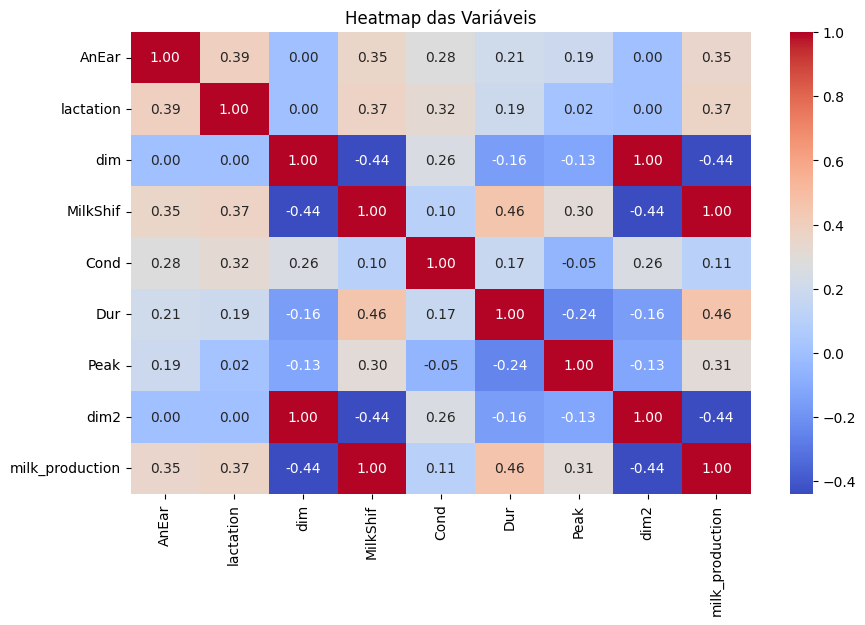

In [8]:
#Definindo as variáveis para o heatmap
variaveis = ['AnEar', 'lactation', 'dim', 'MilkShif', 'Cond', 'Dur', 'Peak', 'dim2', 'milk_production']

#Criando o heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_milk[variaveis].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap das Variáveis')
plt.show()

Text(0.5, 1.0, 'Produção de Leite')

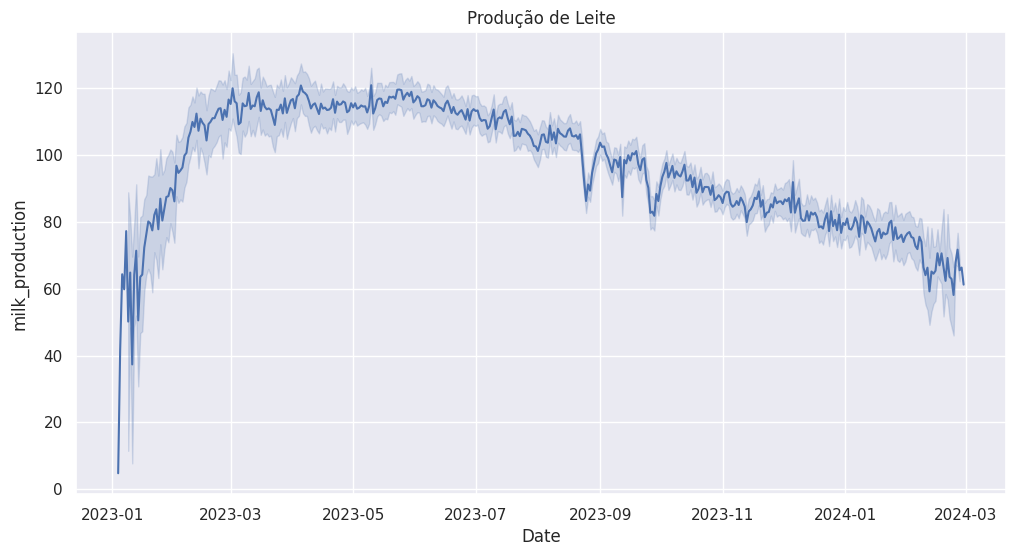

In [9]:
sns.set(style="darkgrid")
plt.figure(figsize=(12,6))
sns.lineplot(x=df_milk["Date"], y="milk_production", data=df_milk).set_title("Produção de Leite")

Armotizando a visualização:

<Axes: xlabel='Date'>

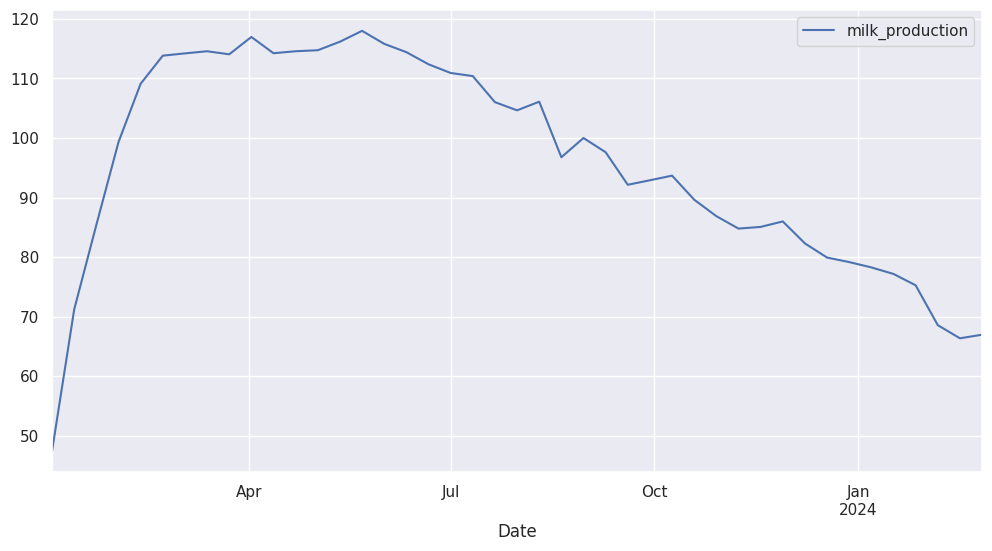

In [10]:
df_milk_am = pd.read_csv("RecurrentNeuralNetwork/milk.csv", parse_dates=["Date"])[["milk_production", "Date"]]
df_milk_am.set_index("Date", inplace=True)
df_milk_am.resample('10D').mean().plot(figsize=(12,6))

In [11]:
df_milk_copy = df_milk.copy()

In [12]:
#df_milk.drop('AnEar', axis=1, inplace=True)
df_milk.drop('Date', axis=1, inplace=True)
df_milk.drop('Cond', axis=1, inplace=True)
df_milk.drop('Dur', axis=1, inplace=True)
df_milk.drop('Peak', axis=1, inplace=True)
df_milk.drop('dim2', axis=1, inplace=True)

In [13]:
df_milk.head()

,AnEar,lactation,dim,MilkShif,milk_production
0,123,4,1,11.50,11.5
1,123,4,2,24.20,48.4
2,123,4,3,33.20,66.4
3,123,4,4,28.55,57.1
4,123,4,5,39.25,78.5


Verificando a frequência da lactação

In [14]:
# Agrupar os dados pela combinação única de valores nas colunas 'AnEar' e 'lactation'
agrupado = df_milk_copy.groupby(['AnEar', 'lactation']).size().reset_index(name='count')
print(agrupado)

# Contar o número de vacas únicas para cada valor de lactation
frequencia = agrupado.groupby('lactation')['AnEar'].count()

# Exibir a frequência de vacas únicas com base no número de lactation
print("Frequência de vacas únicas com base no número de lactation:")
print((frequencia))


    AnEar  lactation  count
0     123          4    305
1    1009          2    305
2    1017          2    305
3    1209          1    305
4    1218          1    305
..    ...        ...    ...
80   9951          2    305
81   9961          2    305
82   9967          2    305
83   9968          2    304
84   9977          2    305

[85 rows x 3 columns]
Frequência de vacas únicas com base no número de lactation:
lactation
1    14
2    26
3    16
4    15
5     5
6     7
7     1
8     1
Name: AnEar, dtype: int64


In [15]:
codigos_vacas = np.array(df_milk_copy["AnEar"].unique())
print(codigos_vacas)

[ 123 1009 1017 1209 1218 1242 1243 1275 1280 1305 1327 1329 1341 1362
 1368 1387 1393 7761 8064 8334 8385 8393 8434 8435 8438 8509 8581 8667
 8723 8732 8741 8932 8947 8996 9005 9066 9069 9078 9081 9090 9101 9149
 9188 9207 9284 9346 9363 9388 9389 9431 9463 9464 9478 9487 9488 9525
 9529 9549 9558 9562 9583 9885 9891 9892 9894 9908 9909 9910 9917 9918
 9920 9922 9926 9928 9929 9933 9939 9943 9944 9946 9951 9961 9967 9968
 9977]


In [16]:
train = []
validation = []
test = []

In [17]:
df_milk[(df_milk['lactation'] == 4) & (df_milk['AnEar'] == 123)]

,AnEar,lactation,dim,MilkShif,milk_production
0,123,4,1,11.50,11.5
1,123,4,2,24.20,48.4
2,123,4,3,33.20,66.4
3,123,4,4,28.55,57.1
4,123,4,5,39.25,78.5
...,...,...,...,...,...
300,123,4,301,24.65,49.3
301,123,4,302,23.00,46.0
302,123,4,303,24.80,49.6
303,123,4,304,23.30,46.6


In [18]:
#for i in range(len(frequencia)):
#    #dados_vaca = df_milk.loc[((df_milk['lactation'] == i))]
#    # Dividir as vacas do grupo atual em treinamento, validação e teste
#    df_temp = df_milk[df_milk['lactation'] == i+1]
#    vacas_treinamento, vacas_temp = train_test_split(df_temp, train_size=0.6, random_state=42)
#    vacas_validacao, vacas_teste = train_test_split(vacas_temp, train_size=0.5, random_state=42)
#    for i in range(len(vacas_treinamento)):
#        train.append(vacas_treinamento)
#    for j in range(len(vacas_validacao)):
#        validation.append(vacas_validacao)
#        test.append(vacas_teste)
#print(len(train))
#print(len(validation))
#print(len(test))
#print(len(train) + len(validation) + len(test))

In [19]:
teste_anear = df_milk[(df_milk['lactation'] == 4) & (df_milk['AnEar'] == 123)]
teste_anear

,AnEar,lactation,dim,MilkShif,milk_production
0,123,4,1,11.50,11.5
1,123,4,2,24.20,48.4
2,123,4,3,33.20,66.4
3,123,4,4,28.55,57.1
4,123,4,5,39.25,78.5
...,...,...,...,...,...
300,123,4,301,24.65,49.3
301,123,4,302,23.00,46.0
302,123,4,303,24.80,49.6
303,123,4,304,23.30,46.6


# Separação de vacas

Lógica utilizada atualmente

In [20]:
def janelas_da_vaca_2(df, nome_vaca, tam):
    tam_train = int(tam * 0.7)
    janelas_train = []
    janelas_val = []
    janelas_test = []
    input_vaca = df[df["AnEar"]==nome_vaca].to_numpy()
    target_vaca = df[df["AnEar"]==nome_vaca]["milk_production"].to_numpy()
    #print("Input vaca:", input_vaca[1][1:4])
    #print("Target vaca:", target_vaca[1])
    for i in range(tam_train):
        #print("i:", i)
        janelas_train.append([input_vaca[i][1:4], [target_vaca[i]]])
        #print("VACA", input[1:4])
    for j in range(tam_train, tam+1, 1):
        #print("j:", j, "tamanho:", range(tam_train+1, tam_train+1, 1))
        janelas_val.append([input_vaca[j-1][1:4], [target_vaca[j-1]]])
    for k in range(tam+1, len(input_vaca)+1, 1):
        #print("k:", k, "tamanho:", range(tam, len(input_vaca), 1))
        janelas_test.append([input_vaca[k-1][1:4], [target_vaca[k-1]]])

    return janelas_train, janelas_val, janelas_test

tam_janela = 50
janelas_2 = {'xtrain':[], 'xval':[], 'xtest':[], 'ytrain':[], 'yval':[], 'ytest':[]}
janelas_data = [janelas_da_vaca_2(df_milk, vaca, tam_janela) for vaca in codigos_vacas]
for janelas_treino, janelas_validacao, janelas_teste in janelas_data:
    for janela in janelas_treino:
        janelas_2["xtrain"].append(janela[0])
        janelas_2["ytrain"].append(janela[1])
    for janela in janelas_validacao:
        janelas_2["xval"].append(janela[0])
        janelas_2["yval"].append(janela[1])
    for janela in janelas_teste:
        janelas_2["xtest"].append(janela[0])
        janelas_2["ytest"].append(janela[1])

X_train, y_train = np.array(janelas_2["xtrain"]), np.array(janelas_2["ytrain"])
X_val, y_val = np.array(janelas_2["xval"]), np.array(janelas_2["yval"])
X_test, y_test = np.array(janelas_2["xtest"]), np.array(janelas_2["ytest"])

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(2975, 3) (2975, 1)
(1360, 3) (1360, 1)
(21596, 3) (21596, 1)


In [21]:
print("Input Treino:", X_train[1], "Target Treino:", y_train[1])
print("Input Validação:", X_train[0], "Target Validação:", y_train[0])
print("Input Teste:", X_train[0], "Target Teste:", y_train[0])

Input Treino: [ 4.   2.  24.2] Target Treino: [48.4]
Input Validação: [ 4.   1.  11.5] Target Validação: [11.5]
Input Teste: [ 4.   1.  11.5] Target Teste: [11.5]


# Separação da vacas

Esta lógica não está sendo aplicada.

In [22]:
#np_vacas_train = np.array([])
#np_vacas_val = np.array([])
#np_vacas_test = np.array([])
#
#for i in range(len(frequencia)):
#    df_temp_lac = df_milk[df_milk['lactation'] == i+1]
#    AnEar_array = df_temp_lac['AnEar'].unique()
#
#    # Ordem invertida para garantir que vamos pegar os valores de lactação 7 e 8 para o treinamento, pois estes têm somente 1 valor de cada
#    vacas_test, vacas_val, vacas_train = np.split(AnEar_array, [int(len(AnEar_array)*0.2), int(len(AnEar_array)*0.4)])
#
#    np_vacas_train = np.append(np_vacas_train, vacas_train)
#    np_vacas_val = np.append(np_vacas_val, vacas_val)
#    np_vacas_test = np.append(np_vacas_test, vacas_test)
#
#print("Vacas Treino:", np_vacas_train, "\nQuantidade de vacas treino:", len(np_vacas_train))
#print("Vacas Validação:",np_vacas_val, "\nQuantidade de vacas validação:", len(np_vacas_val))
#print("Vacas Teste:",np_vacas_test, "\nQuantidade de vacas teste:", len(np_vacas_test))

In [23]:
#vacas = {'train':np_vacas_train, 'val':np_vacas_val, 'test':np_vacas_test}
##dict_dfs = {'df_train':list_train, 'df_val':list_val, 'df_test':list_test}

In [24]:
#def janelas_da_vaca(df, nome_vaca, tam):
#    janelas = []
#    input_vaca = df[df["AnEar"]==nome_vaca].to_numpy()
#    target_vaca = df[df["AnEar"]==nome_vaca]["milk_production"].to_numpy()
#    #print("Input vaca:", input_vaca[1][1:4])
#    #print("Target vaca:", target_vaca[1])
#    for i in range(tam):
#        janelas.append([input_vaca[i][1:4], [target_vaca[i]]])
#        #print("VACA", input[1:4])
#    return janelas
#
#tam_janela = 50
#janelas = {'xtrain':[], 'xval':[], 'xtest':[], 'ytrain':[], 'yval':[], 'ytest':[]}
#for tipo in ['train', 'val', 'test']:
#    janelas_tipos = [janelas_da_vaca(df_milk, vaca, tam_janela) for vaca in vacas[tipo]]
#    for vaca in janelas_tipos:
#        for janela in vaca:
#            janelas[f"x{tipo}"].append(janela[0])
#            janelas[f"y{tipo}"].append(janela[1])
#
#X_train, y_train = np.array(janelas["xtrain"]), np.array(janelas["ytrain"])
#X_val, y_val = np.array(janelas["xval"]), np.array(janelas["yval"])
#X_test, y_test = np.array(janelas["xtest"]), np.array(janelas["ytest"])
#
#print(X_train.shape, y_train.shape)
#print(X_val.shape, y_val.shape)
#print(X_test.shape, y_test.shape)

In [25]:
#print("Inputs Treinamento:", X_train[2])
#print("Target Treinamento:", y_train[2])

In [26]:
xsc = MinMaxScaler().fit(X_train)
X_train = xsc.transform(X_train)
X_val = xsc.transform(X_val)
X_test = xsc.transform(X_test)

#X_train = X_train.reshape((len(X_train), tam_janela, 1))
#X_val = X_val.reshape((len(X_val), tam_janela, 1))
#X_test = X_test.reshape((len(X_test), tam_janela, 1))

ysc = MinMaxScaler().fit(y_train)
y_train = ysc.transform(y_train)
y_val = ysc.transform(y_val)
y_test = ysc.transform(y_test)

## Construção da Rede Neural

In [27]:
#pip install scikeras

In [28]:
import tensorflow as tf
from keras import Sequential, Model, layers, callbacks, optimizers
#from keras.models import Sequential, Model
#from keras.layers import Dense, Flatten, Dropout, BatchNormalization
#from keras.callbacks import ModelCheckpoint
#from keras.optimizers import Adam
from sklearn.model_selection import GridSearchCV
#from keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasRegressor, KerasClassifier

In [29]:
def get_model(hidden_layer_sizes, dropout, learning_rate):
  model=Sequential()
  model.add(layers.InputLayer((3,)))
  model.add(layers.Flatten())
  model.add(layers.Dense(hidden_layer_sizes, activation="relu", kernel_initializer="he_uniform"))
  model.add(layers.Dropout(dropout))
  model.add(layers.BatchNormalization())
  model.add(layers.Dense(hidden_layer_sizes, activation="relu", kernel_initializer="he_uniform"))
  model.add(layers.Dropout(dropout))
  model.add(layers.BatchNormalization())
  model.add(layers.Dense(hidden_layer_sizes, activation="relu", kernel_initializer="he_uniform"))
  model.add(layers.Dropout(dropout))
  model.add(layers.BatchNormalization())
  model.add(layers.Dense(hidden_layer_sizes, activation="relu", kernel_initializer="he_uniform"))
  model.add(layers.Dropout(dropout))
  model.add(layers.Dense(1,activation="linear"))

  #final_model = Model([model.input], out)
  model.compile(loss='mean_absolute_error', optimizer=optimizers.Adam(learning_rate=learning_rate), metrics=['mae'])

  return model

In [30]:
import keras
keras.__version__

'3.3.3'

In [31]:
print(tf.config.list_physical_devices('GPU'))

[]


In [32]:
import os
os.environ["XLA_FLAGS"] = "--xla_cpu_multi_thread_eigen=false"

In [ ]:
# Criando o objeto KerasClassifier
#keras_clf = KerasRegressor(model = get_model, loss="mean_squared_error", optimizer="adam", optimizer__learning_rate= 0.1, hidden_layer_sizes = 100, dropout = 0.0, batch_size=32, verbose=False)
#keras_clf = KerasRegressor(model= get_model(), dropout=0.3,  hidden_layer_sizes= 256, learnRate=1e-2, verbose=False)
keras_clf = KerasRegressor(model=get_model, dropout=0.3, hidden_layer_sizes=256, learning_rate=0.01, loss=mean_absolute_error)

# define a grid of the hyperparameter search space
hidden_layer_sizes = [256, 512]
learnRate = [1e-2, 1e-3]
dropout = [0.3, 0.5]
batchSize = [32]

# create a dictionary from the hyperparameter grid
grid = dict(
	hidden_layer_sizes=hidden_layer_sizes,
	learning_rate=learnRate,
	dropout=dropout,
	batch_size=batchSize
)

## Definindo os valores dos hiperparâmetros
#parameters = {
#    'optimizer': ['sgd', 'adam'],
#    'optimizer__learning_rate': [0.1, 0.001, 0.0001],
#    'model__dropout': [0.3, 0.4, 0.5],
#    'model__hidden_layer_sizes': [100, 300, 600]
#}

# Criando o objeto GridSearchCV
grid_search = GridSearchCV(estimator=keras_clf, param_grid=grid, n_jobs=16, cv=3, error_score='raise')

#tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="tensorboard", histogram_freq=5000, update_freq='batch', write_grads=True)
#tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="tensorboard", histogram_freq=5000, update_freq='batch')

# Treinando o grid search
grid_result = grid_search.fit(X_train, y_train, epochs=50, validation_data=(X_val,y_val))




print(grid_result.best_score_, grid_result.best_params_)
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


KeyboardInterrupt: 

In [ ]:
testt = keras_clf.get_params().keys()
testt